In [1]:
#TO remove :
import os
directory = os.getcwd()
print(directory)

C:\Users\s1114237\OneDrive - Syngenta\Formations\Training\EPFL extension school\Machine_Learning_EPFL-extension-school\Course#3 Applied Machine Learning 1\Project_C3\Houses-Prices


In [2]:
#os.chdir("Machine_Learning_EPFL-extension-school\Course#3 Applied Machine Learning 1\Project_C3\Warm-Up")
#directory = os.getcwd()
#print(directory)

In [3]:
# library 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import SGDRegressor

In [4]:
#functions 
# print a complete table : (source: https://stackoverflow.com/questions/19124601/pretty-print-an-entire-pandas-series-dataframe )
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    pd.options.display.max_colwidth = 150# (source : https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe)
    display(x)
    pd.reset_option('display.max_rows') 
    pd.options.display.max_colwidth = 50 

# House - prices  

### Task : 
- A) [Exploratory data analysis and data cleaning](#TaskA)
- B) [Feature engineering](#TaskB)
- C) [Splitting data](#TaskC)
- D) [Model fitting](#TaskD)
- E) [Regularization](#TaskE)
- F) [Evaluation](#TaskF)
- G) [Prediction](#TaskG)

 

<a id="TaskA"></a>
## Exploratory data analysis and data cleaning

Data: 2930 * 82 attributes cf documentation.txt
Training set : 2430 first ones 
test set : 500 last ones (no prices)

- The order and PID : identifiers
- the data isn't clean : there are incorrect and missing data

### Load data

In [5]:
# Download 
data_df = pd.read_csv("house-prices.csv")
data_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


### Numbers of rows and columns :

In [6]:
data_df.shape

(2430, 82)

This data set correspond to the training set.

### Data type :

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2430 non-null   int64  
 1   PID              2430 non-null   int64  
 2   MS SubClass      2430 non-null   int64  
 3   MS Zoning        2430 non-null   object 
 4   Lot Frontage     2010 non-null   float64
 5   Lot Area         2430 non-null   int64  
 6   Street           2430 non-null   object 
 7   Alley            163 non-null    object 
 8   Lot Shape        2430 non-null   object 
 9   Land Contour     2430 non-null   object 
 10  Utilities        2430 non-null   object 
 11  Lot Config       2430 non-null   object 
 12  Land Slope       2430 non-null   object 
 13  Neighborhood     2430 non-null   object 
 14  Condition 1      2430 non-null   object 
 15  Condition 2      2430 non-null   object 
 16  Bldg Type        2430 non-null   object 
 17  House Style   

### Set of variable :

From the info and the documentation we create different set of column lists :
- List of categorical variables (without identifier columns)
- sub list with nominal variables
- sub list with ordinal variables
- List of quantitative variables
- sub list with only continous variables
- sub list with only discrete variables

In [8]:
data_df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [9]:
cat_col = ['MS SubClass','MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 
           'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 
           'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style', 'Roof Matl', 
           'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond',  'Foundation', 
           'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 
           'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 
           'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 
           'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']

In [10]:
cat_nom_col = ['MS SubClass', #(Nominal) : Identifies the type of dwelling involved in the sale.
           'MS Zoning', # (Nominal): Identifies the general zoning classification of the sale.
           'Street', # Street (Nominal): Type of road access to property
           'Alley', # Alley (Nominal): Type of alley access to property
           'Land Contour', # Land Contour (Nominal): Flatness of the property               
           'Lot Config', # Lot Config (Nominal): Lot configuration
           'Neighborhood',# Neighborhood (Nominal): Physical locations within Ames city limits (map available)
           'Condition 1',# Condition 1 (Nominal): Proximity to various conditions
           'Condition 2', # Condition 2 (Nominal): Proximity to various conditions (if more than one is present)
           'Bldg Type',# Bldg Type (Nominal): Type of dwelling
           'House Style', # House Style (Nominal): Style of dwelling 
           'Roof Style',# Roof Style (Nominal): Type of roof
           'Roof Matl', # Roof Matl (Nominal): Roof material
           'Exterior 1st', # Exterior 1 (Nominal): Exterior covering on house
           'Exterior 2nd',# Exterior 2 (Nominal): Exterior covering on house (if more than one material)
           'Mas Vnr Type',# Mas Vnr Type (Nominal): Masonry veneer type
           'Foundation', # Foundation (Nominal): Type of foundation 
           'Heating', # Heating	(Nominal): Type of heating 
           'Central Air', # Central Air (Nominal): Central air conditioning
           'Garage Type', # Garage Type (Nominal): Garage location
           'Misc Feature', # Misc Feature (Nominal): Miscellaneous feature not covered in other categories
           'Sale Type', # Sale Type (Nominal): Type of sale
           'Sale Condition' # Sale Condition (Nominal): Condition of sale
              ]

In [11]:
cat_ord_col = ['Lot Shape', # Lot Shape (Ordinal): General shape of property
               'Utilities', # Utilities (Ordinal): Type of utilities available
               'Land Slope', # Land Slope (Ordinal): Slope of property 
               'Overall Qual',# Overall Qual (Ordinal): Rates the overall material and finish of the house
               'Overall Cond', # Overall Cond (Ordinal): Rates the overall condition of the house
               'Exter Qual',# Exter Qual (Ordinal): Evaluates the quality of the material on the exterior 
               'Exter Cond', # Exter Cond (Ordinal): Evaluates the present condition of the material on the exterior
               'Bsmt Qual', # Bsmt Qual (Ordinal): Evaluates the height of the basement
               'Bsmt Cond', # Bsmt Cond (Ordinal): Evaluates the general condition of the basement
               'Bsmt Exposure', # Bsmt Exposure (Ordinal): Refers to walkout or garden level walls
               'BsmtFin Type 1', # BsmtFin Type 1 (Ordinal): Rating of basement finished area
               'BsmtFin Type 2', # BsmtFinType 2 (Ordinal): Rating of basement finished area (if multiple types) 
               'Heating QC', # HeatingQC (Ordinal): Heating quality and condition
               'Electrical', # Electrical (Ordinal): Electrical system
               'Kitchen Qual', # KitchenQual (Ordinal): Kitchen quality
               'Functional', # Functional (Ordinal): Home functionality (Assume typical unless deductions are warranted)
               'Fireplace Qu', # FireplaceQu (Ordinal): Fireplace quality
               'Garage Finish', # Garage Finish (Ordinal): Interior finish of the garage
               'Garage Qual', # Garage Qual (Ordinal): Garage quality
               'Garage Cond', # Garage Cond (Ordinal): Garage condition
               'Paved Drive', # Paved Drive (Ordinal): Paved driveway
               'Pool QC', # Pool QC (Ordinal): Pool quality
               'Fence', # Fence (Ordinal): Fence quality
              ]

In [12]:
num_col = ['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
           'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', 
           '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 
           'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 
           'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 
           'Open Porch SF','Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area',    
           'Misc Val','Mo Sold', 'Yr Sold','SalePrice']

In [13]:
cont_col =['Lot Frontage', #Lot Frontage (Continuous): Linear feet of street connected to property
           'Lot Area', #Lot Area (Continuous): Lot size in square feet
           'Mas Vnr Area', # Mas Vnr Area (Continuous): Masonry veneer area in square feet
           'BsmtFin SF 1', # BsmtFin SF 1 (Continuous): Type 1 finished square feet
           'BsmtFin SF 2', # BsmtFin SF 2 (Continuous): Type 2 finished square feet
           'Bsmt Unf SF', # Bsmt Unf SF (Continuous): Unfinished square feet of basement area
           'Total Bsmt SF', # Total Bsmt SF (Continuous): Total square feet of basement area
           '1st Flr SF', # 1st Flr SF (Continuous): First Floor square feet 
           '2nd Flr SF', # 2nd Flr SF (Continuous)	: Second floor square feet
           'Low Qual Fin SF', # Low Qual Fin SF (Continuous): Low quality finished square feet (all floors)
           'Gr Liv Area', # Gr Liv Area (Continuous): Above grade (ground) living area square feet
           'Garage Area', # Garage Area (Continuous): Size of garage in square feet         
           'Wood Deck SF', # Wood Deck SF (Continuous): Wood deck area in square feet
           'Open Porch SF', # Open Porch SF (Continuous): Open porch area in square feet
           'Enclosed Porch', # Enclosed Porch (Continuous): Enclosed porch area in square feet
           '3Ssn Porch', # 3-Ssn Porch (Continuous): Three season porch area in square feet
           'Screen Porch', # Screen Porch (Continuous): Screen porch area in square feet
           'Pool Area', # Pool Area (Continuous): Pool area in square feet  
           'Misc Val' # Misc Val (Continuous): $Value of miscellaneous feature
          ]

In [14]:
disc_col =['Year Built', # Year Built (Discrete): Original construction date
           'Year Remod/Add', # Year Remod/Add (Discrete): Remodel date (same as construction date if no remodeling or additions)
           'Bsmt Full Bath', # Bsmt Full Bath (Discrete): Basement full bathrooms
           'Bsmt Half Bath', # Bsmt Half Bath (Discrete): Basement half bathrooms
           'Full Bath', # Full Bath (Discrete): Full bathrooms above grade
           'Half Bath', # Half Bath (Discrete): Half baths above grade
           'Bedroom AbvGr', # Bedroom (Discrete): Bedrooms above grade (does NOT include basement bedrooms)
           'Kitchen AbvGr', # Kitchen (Discrete): Kitchens above grade
           'TotRms AbvGrd', # TotRmsAbvGrd (Discrete): Total rooms above grade (does not include bathrooms)
           'Fireplaces',  # Fireplaces (Discrete): Number of fireplaces          
           'Garage Yr Blt', # Garage Yr Blt (Discrete): Year garage was built         
           'Garage Cars', # Garage Cars (Discrete): Size of garage in car capacity
           'Mo Sold', # Mo Sold (Discrete): Month Sold (MM)
           'Yr Sold' # Yr Sold (Discrete): Year Sold (YYYY)
          ]

### graphical representation :
We want to plot the data. 
It will allow us to apprehend range of the different input, if some variable are shrink or if some have visible outliers. Firstly we will just plot the numerical variables. Then we will plot them against the 'sale price' to see if we detect correlation or transformation to apply. 


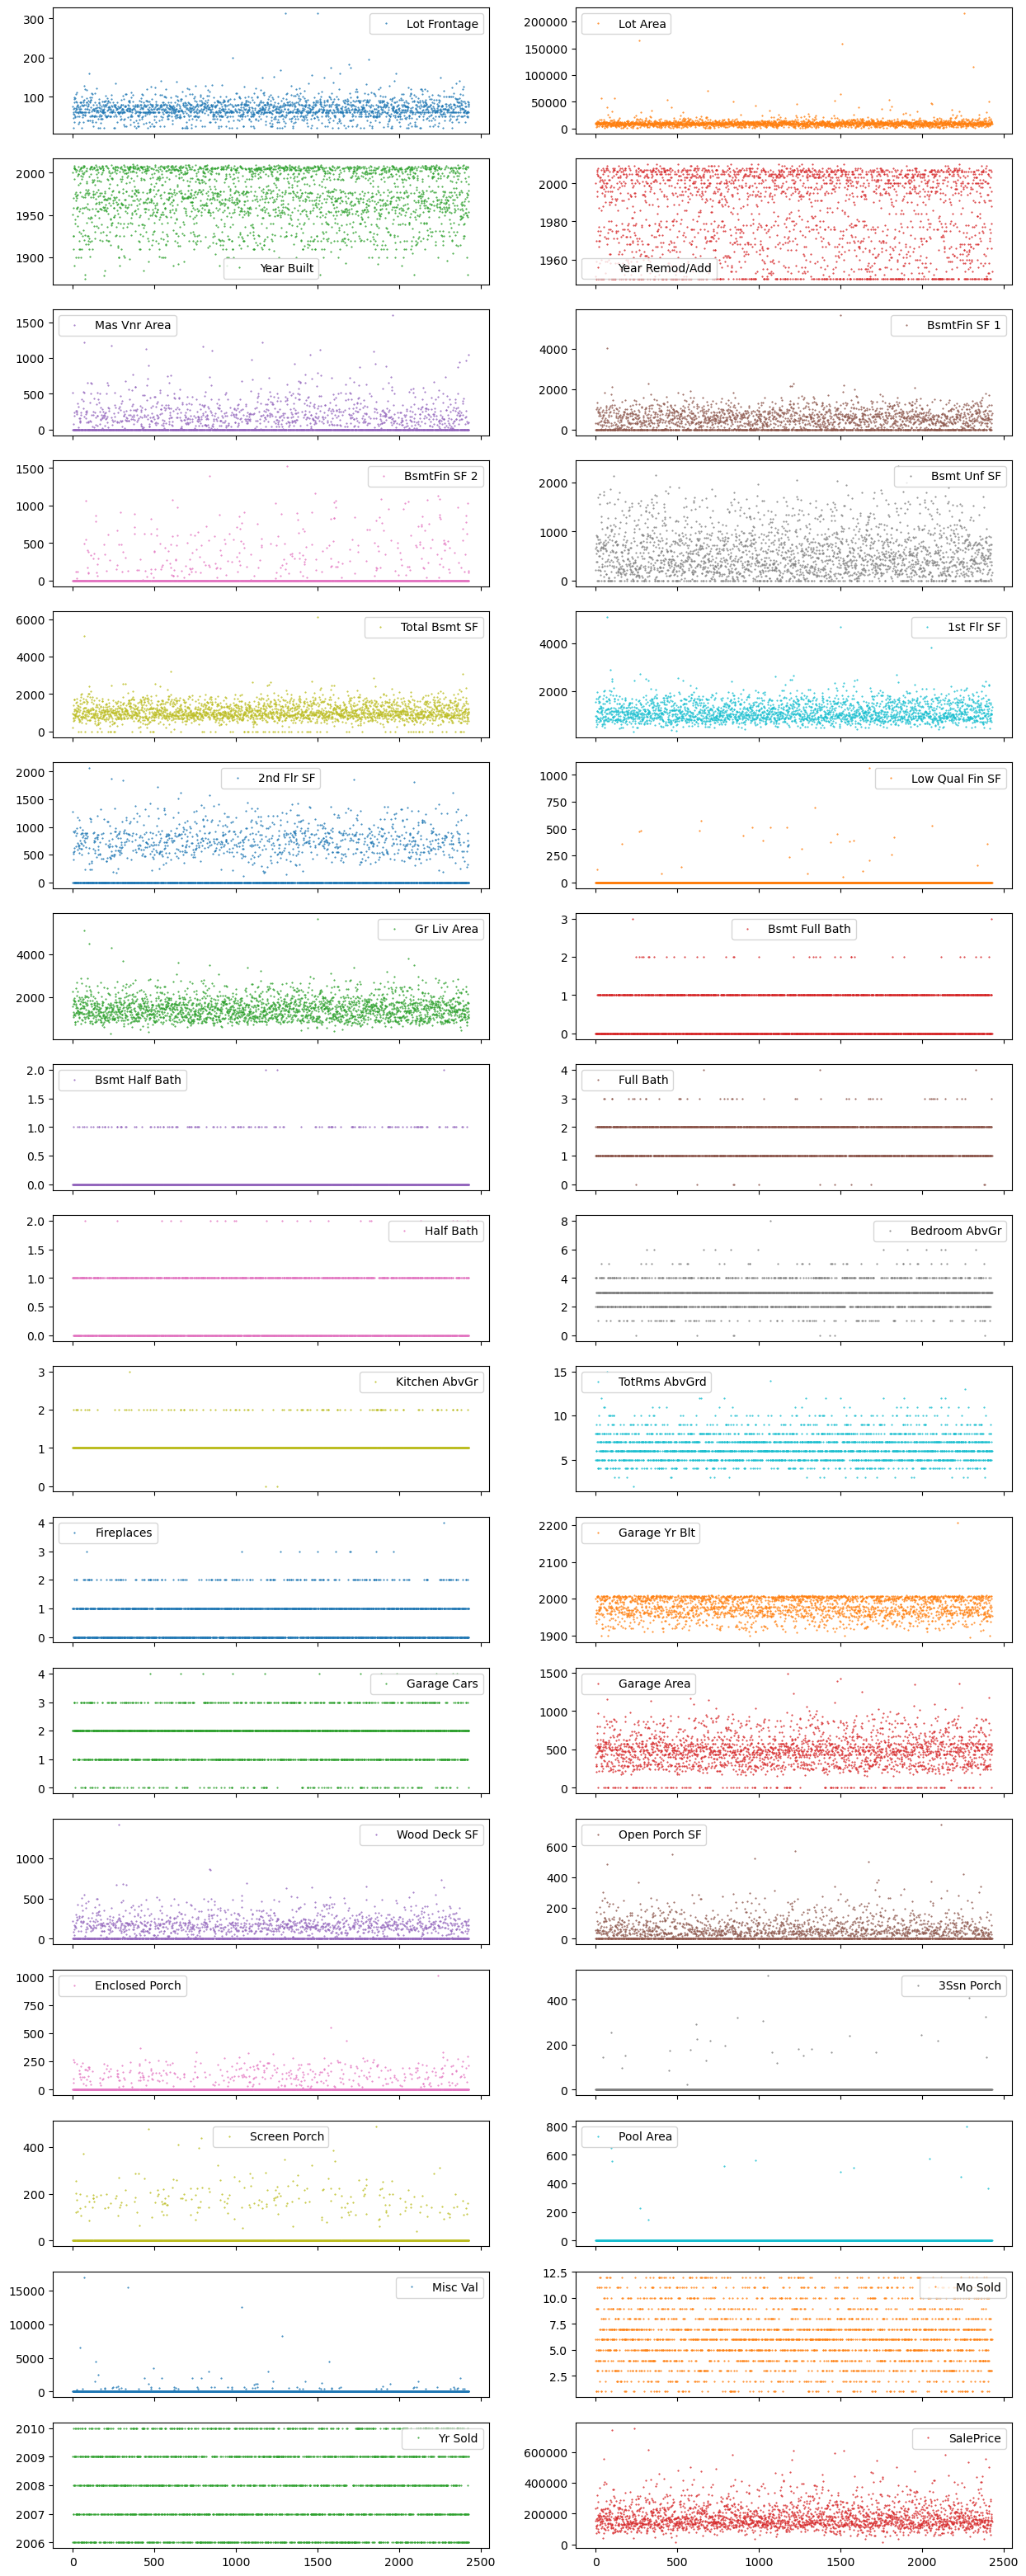

In [15]:
data_df[num_col].plot(lw=0, marker=".", subplots=True, layout=(-1, 2), figsize=(15, 40), markersize=1);

- Garage Yr Blt : show a visible outlier. A year 2200 is not possible. It's probably a typpo.
- We didn't detect variables with a lot of missing data. But We will have to go deeper into this later.

Before checking the distribution of the numerical variables we check quicly the error of the variable 'Garage Yr Blt' 

In [16]:
print(data_df[['Year Built','Year Remod/Add','Garage Yr Blt']][data_df['Garage Yr Blt']>2024])

      Year Built  Year Remod/Add  Garage Yr Blt
2219        2006            2007         2207.0


The error on the Garage  year built look like a typpo error and the garage can only be built between 2006 and  2007. By changing the value 2207 by 2007 we should stay close to the reality.

In [17]:
data_df.loc[data_df['Garage Yr Blt']>2024, 'Garage Yr Blt'] = 2007

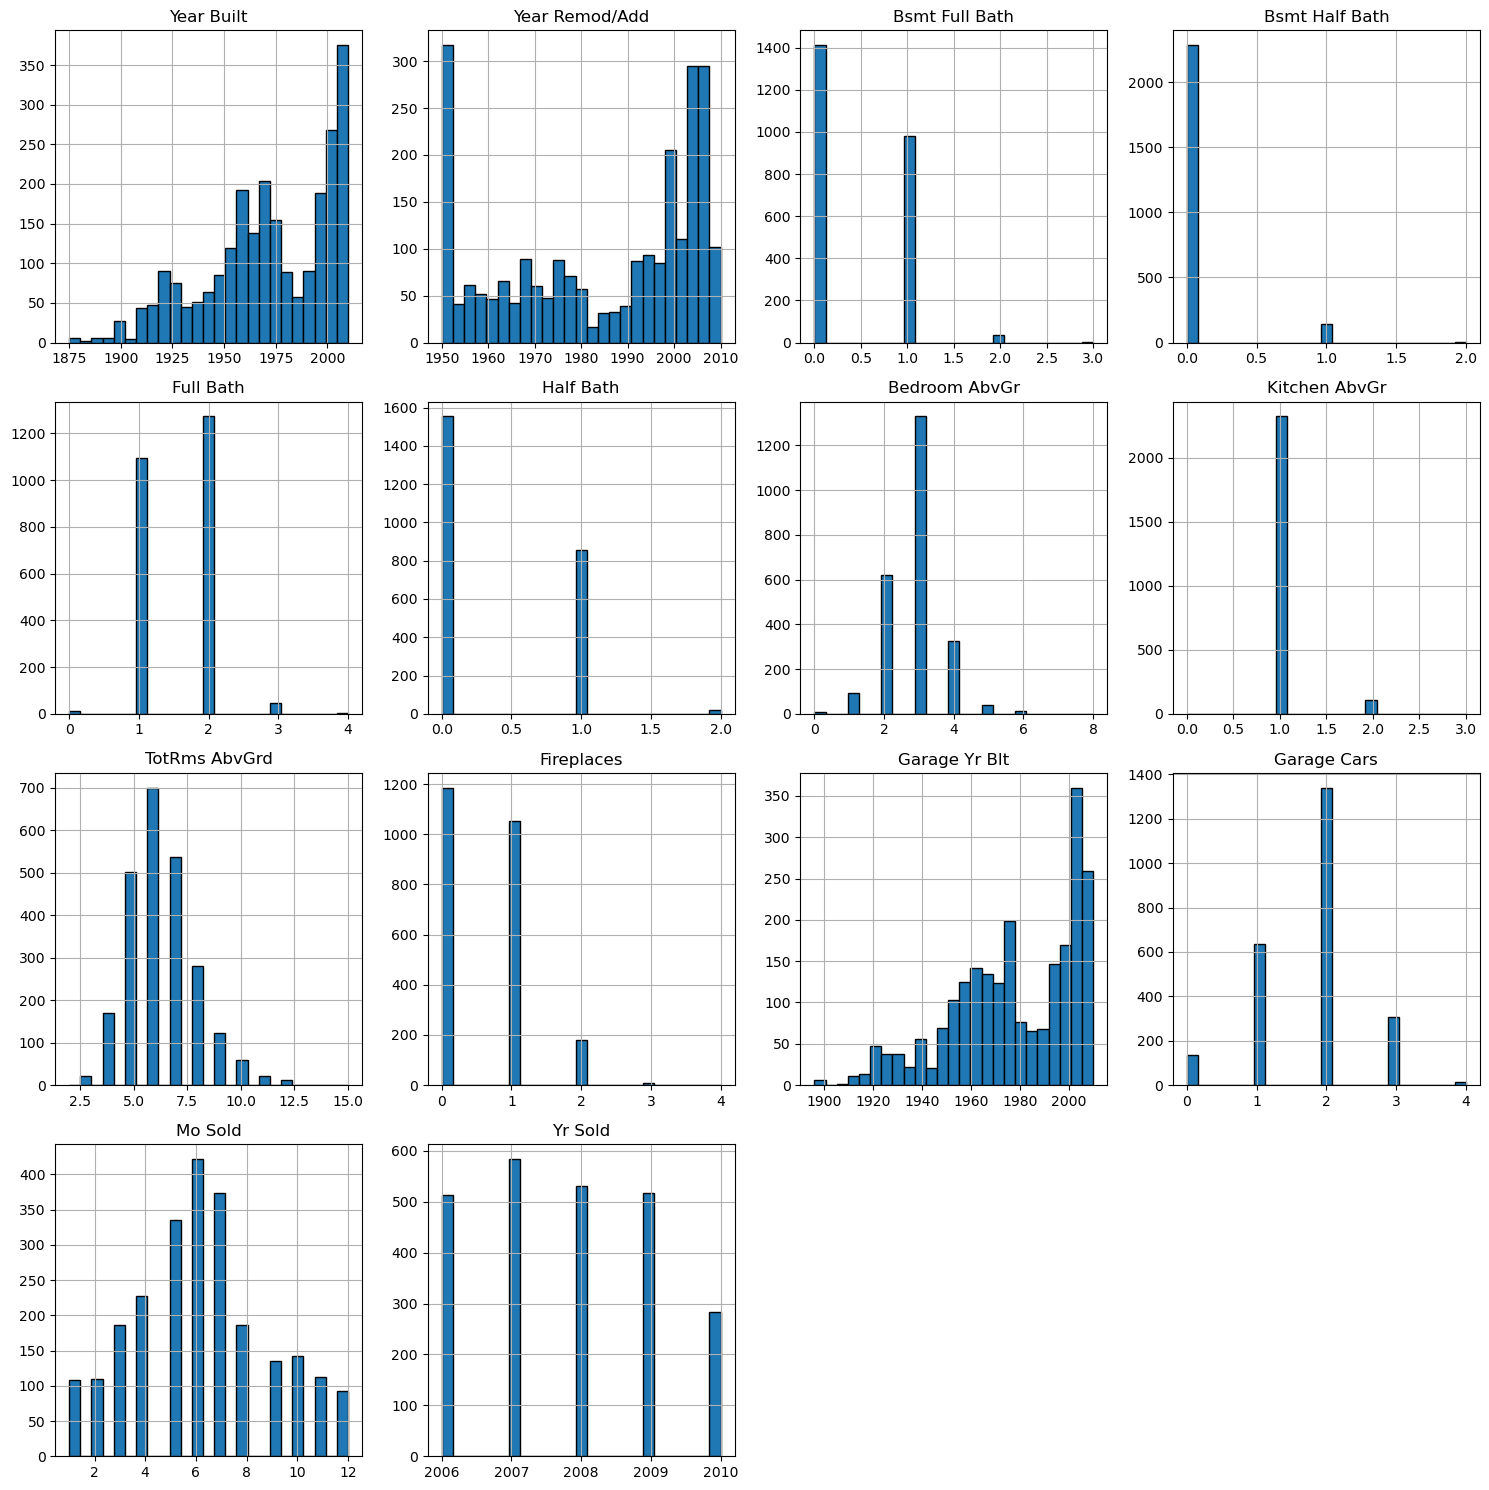

In [18]:
# Plots the histogram for each discret feature in a separate subplot
data_df[disc_col].hist(bins=25, figsize=(15, 15), layout=(-1, 4), edgecolor="black")
plt.tight_layout()

The distrubution of discrete column is not monotone. 
We pot the distribution of continuous variable and nextt to the distribution of the same variable log-transformed : 

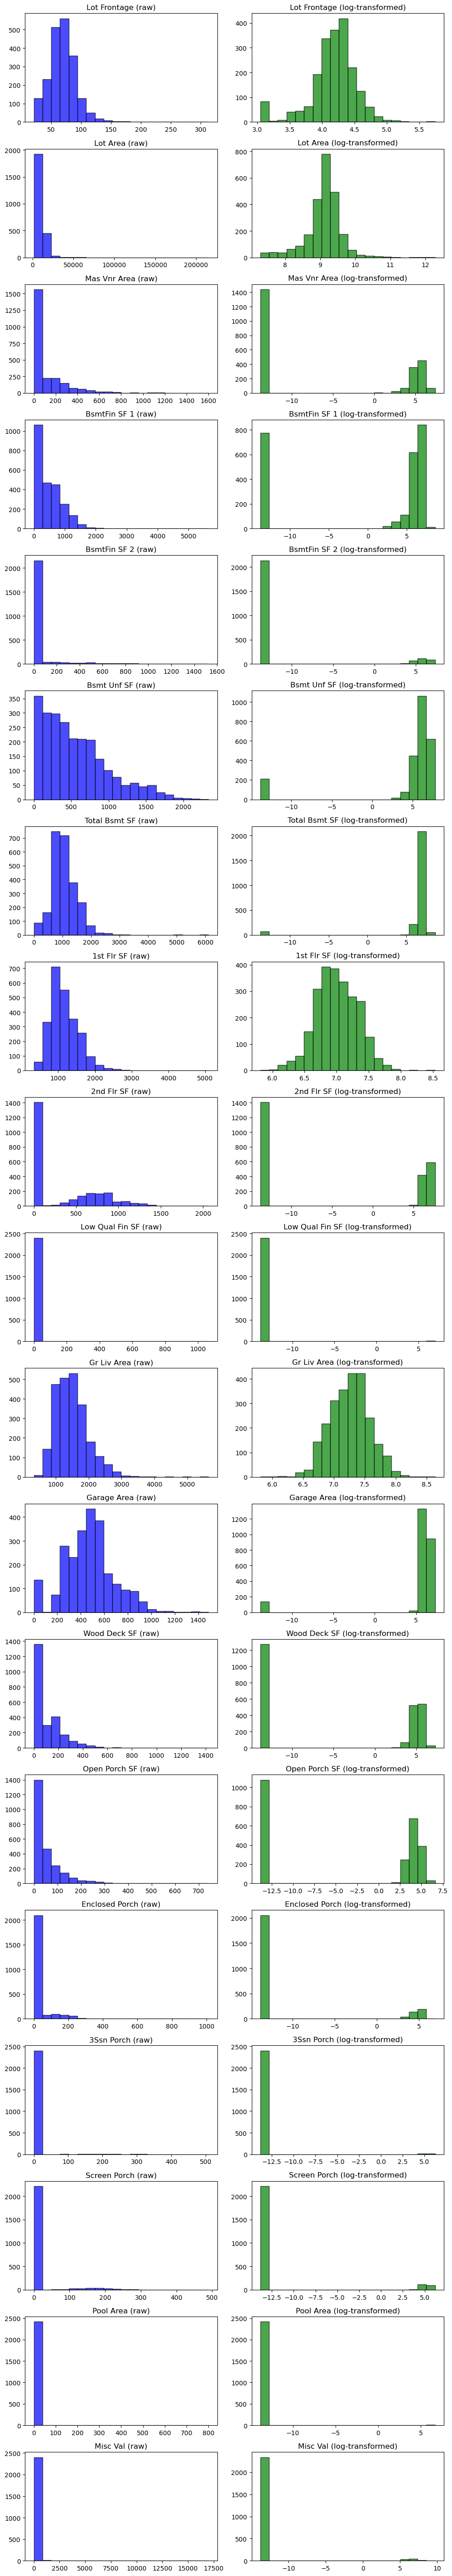

In [19]:
# Calcul des logarithmes, en ajoutant une petite constante pour éviter le log(0)
epsilon = 1e-6
df_log = np.log(data_df[cont_col] + epsilon)

# Nombre de variables (colonnes) à tracer
num_vars = len(cont_col)

# Création des subplots
fig, axes = plt.subplots(nrows=num_vars, ncols=2, figsize=(10, 3 * num_vars))

for i, col in enumerate(cont_col):
    # Histogramme de la variable brute
    axes[i, 0].hist(data_df[cont_col][col], bins=20, color='blue', alpha=0.7, edgecolor="black")
    axes[i, 0].set_title(f'{col} (raw)')
    
    # Histogramme de la variable transformée par le log
    axes[i, 1].hist(df_log[col], bins=20, color='green', alpha=0.7, edgecolor="black")
    axes[i, 1].set_title(f'{col} (log-transformed)')

# Ajustement de l'espacement entre les plots
plt.tight_layout()
plt.show()

Then we compare ne numerical variables to the saleprice :

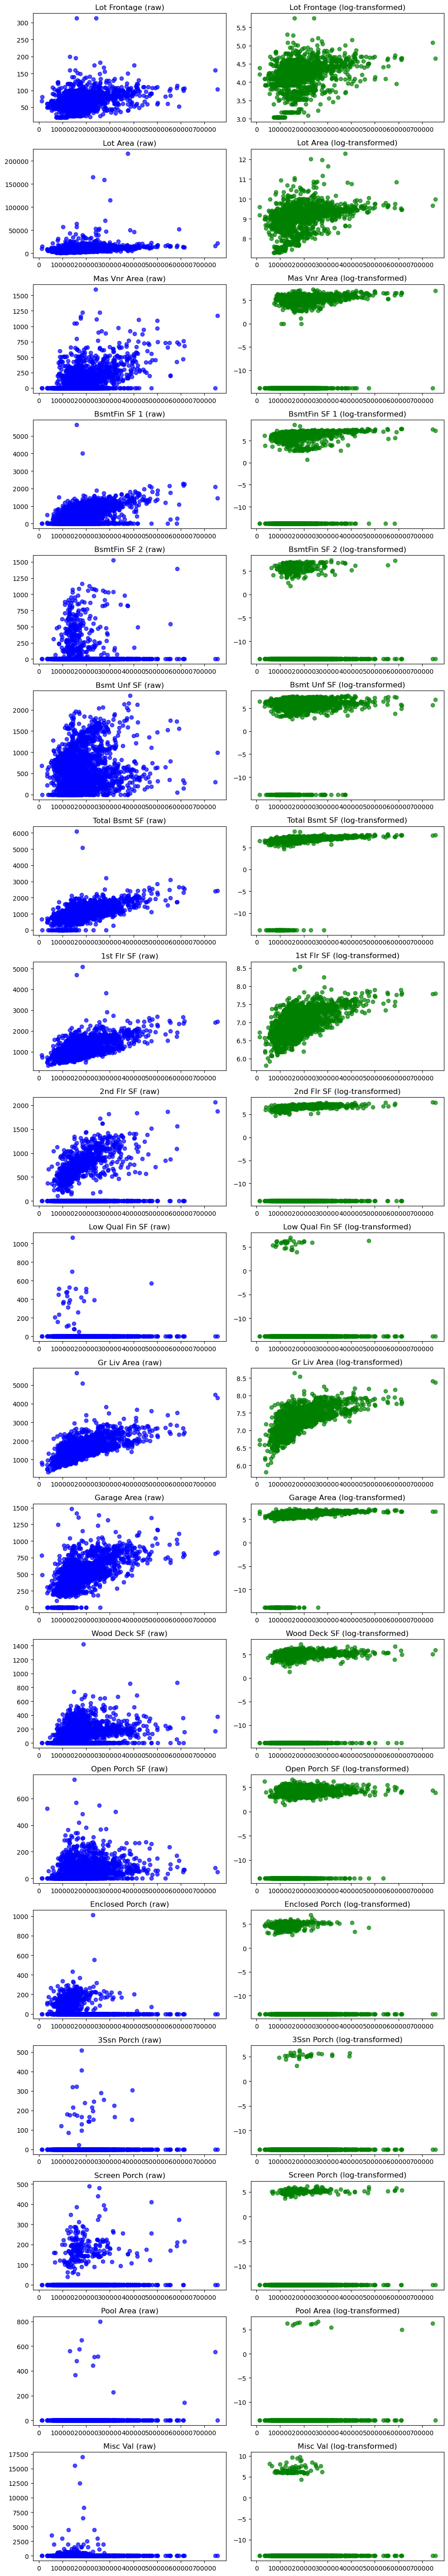

In [20]:
# Calcul des logarithmes, en ajoutant une petite constante pour éviter le log(0)
epsilon = 1e-6
df_log = np.log(data_df[cont_col] + epsilon)

# Nombre de variables (colonnes) à tracer
num_vars = len(cont_col)

# Création des subplots
fig, axes = plt.subplots(nrows=num_vars, ncols=2, figsize=(10, 3 * num_vars))

for i, col in enumerate(cont_col):
    # Histogramme de la variable brute
    axes[i, 0].scatter(data_df['SalePrice'], data_df[cont_col][col], color='blue', alpha=0.7)
    axes[i, 0].set_title(f'{col} (raw)')
    
    # Histogramme de la variable transformée par le log
    axes[i, 1].scatter(data_df['SalePrice'], df_log[col], color='green', alpha=0.7)
    axes[i, 1].set_title(f'{col} (log-transformed)')

# Ajustement de l'espacement entre les plots
plt.tight_layout()
plt.show()

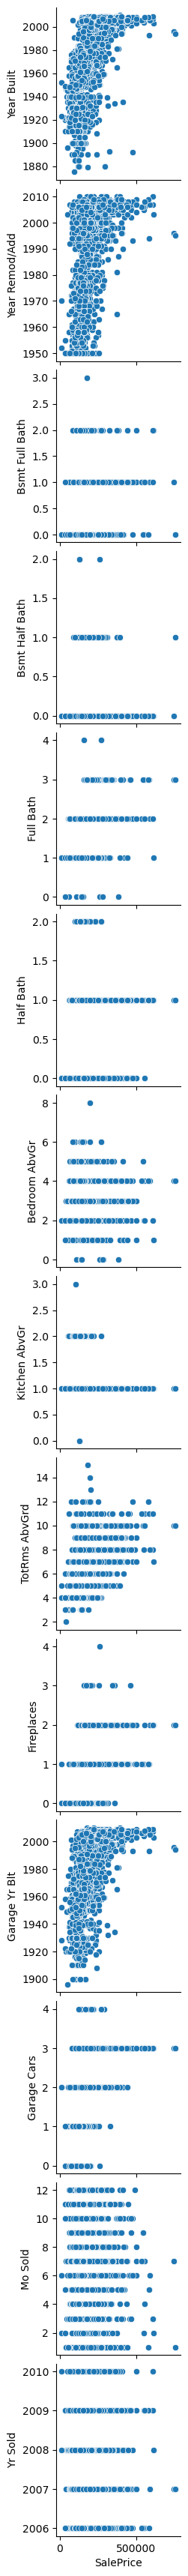

In [21]:
sns.pairplot(data_df, x_vars=['SalePrice'], y_vars = disc_col)

Equally we want to compare categorical variables with sale price : boxplot 

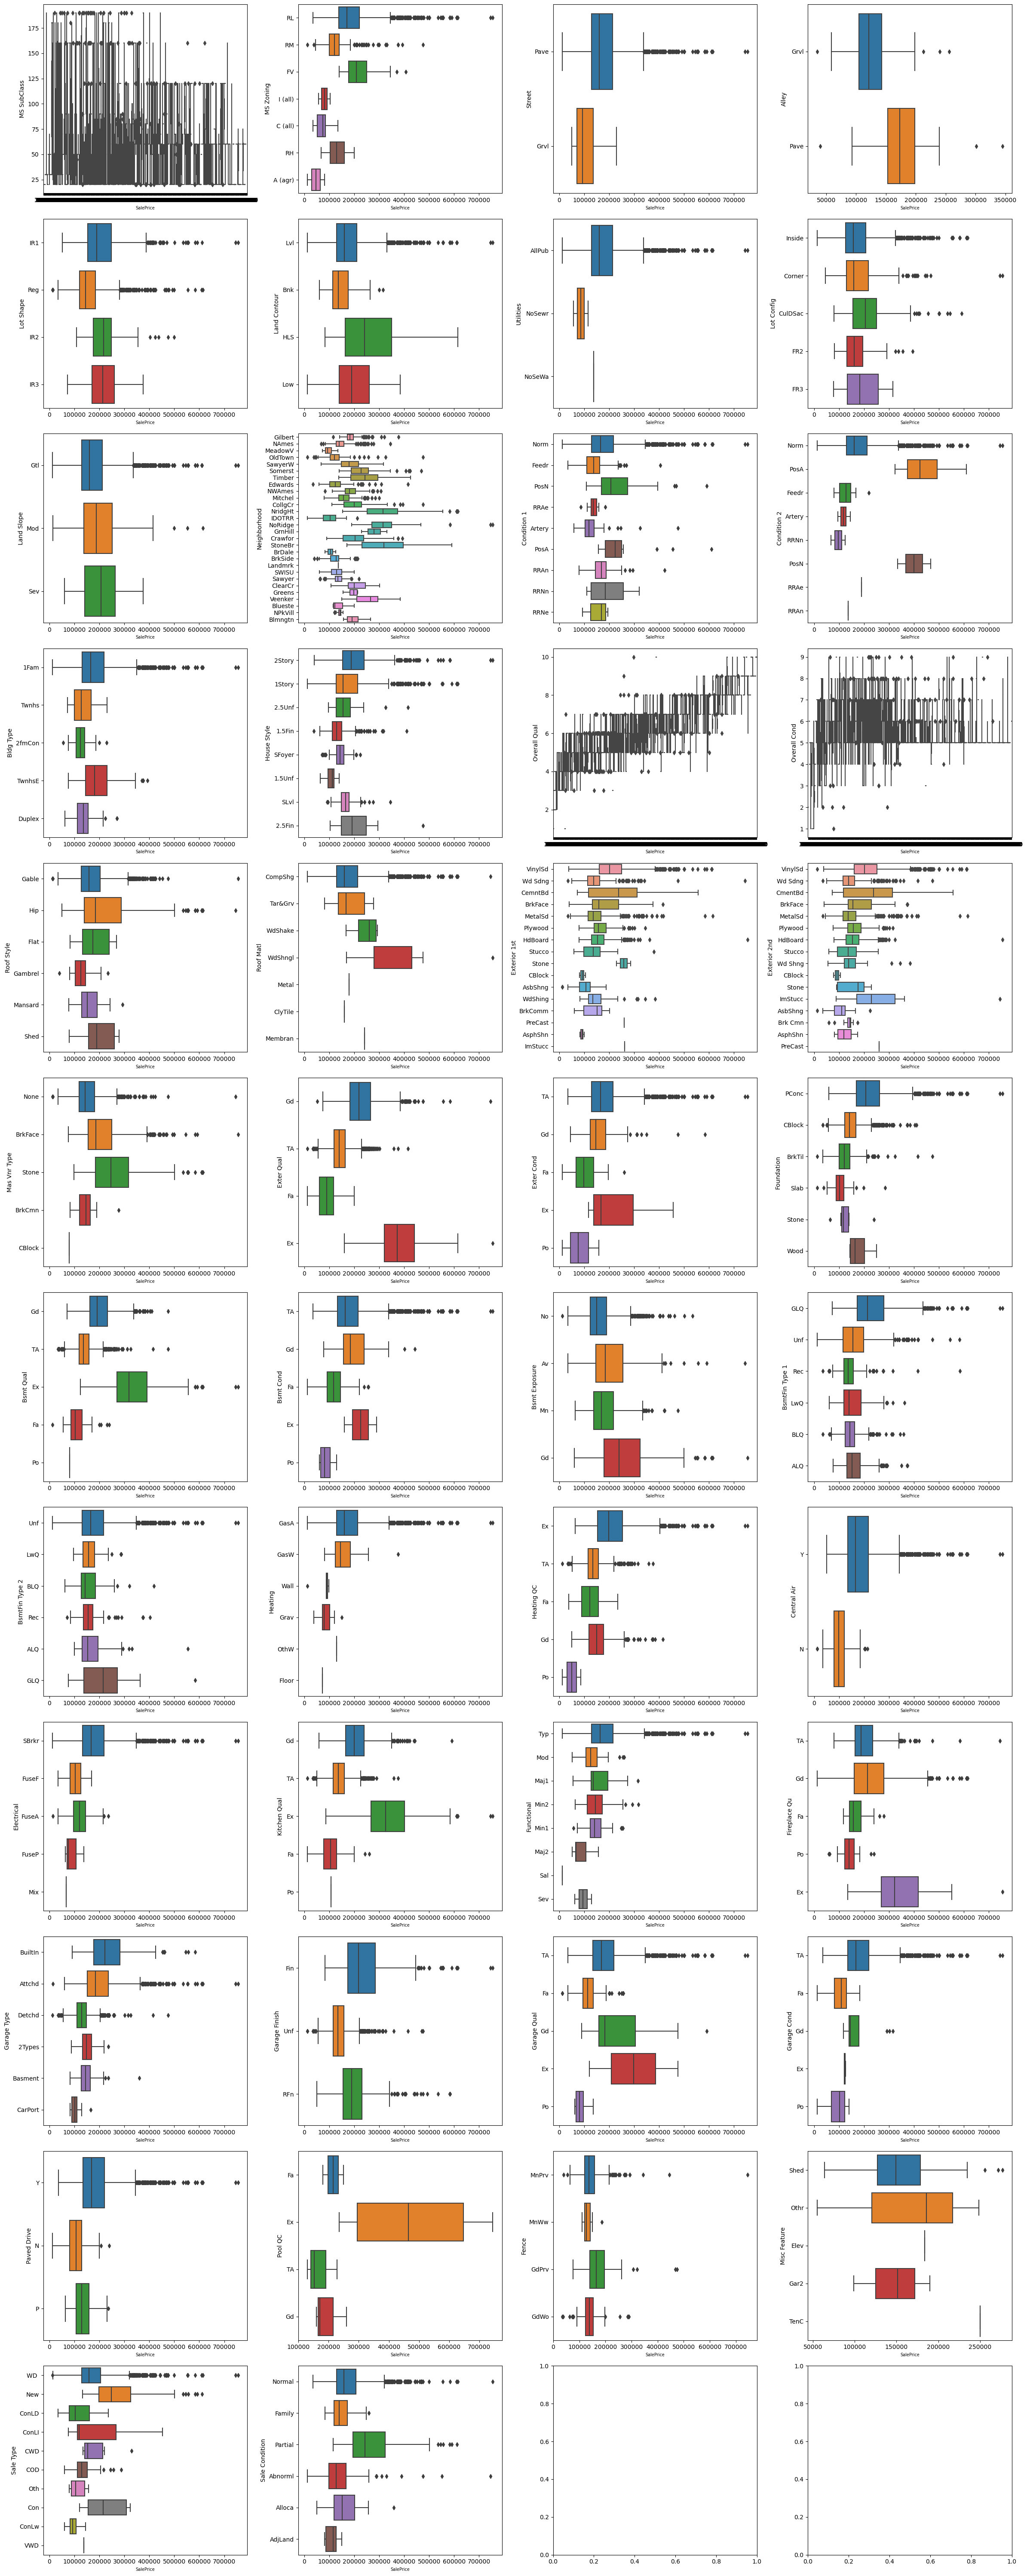

In [22]:

nb_cols = 4 # int(np.sqrt(len(cat_col)))
nb_rows = 12 # int(np.sqrt(len(cat_col))) +1

fig, axes = plt.subplots(nrows = nb_rows, 
                         ncols = nb_cols, 
                         figsize = (6*nb_cols,5*nb_rows)) # sets the width and height of the figure (in inches)
x = 0
y = 0
for i in range(len(cat_col)):
   
    sns.boxplot(data=data_df, y=cat_col[i], x='SalePrice', ax=axes[x,y])# hue=col_cat[i],
    axes[x,y].set_xlabel('SalePrice', fontsize=7)
    
    if (y+1)/nb_cols == 1:
        y = -1
        x = x + 1
    y = y + 1
    
        
fig.tight_layout()

plt.show()

**Bilan** : 
numerical variable :
- Generally normal distribution
- 2-3 variables seems better correlated to sales price after a log transformation : Lot frontage, lot area, 1st Flr SF
- some outlier seems visible  (Hubert regression function to predict should be better)

categorical variable have a huge impact on sale.
- The first category variable 'MS Subclass' has many class, it's too miscellanious the class name is numerical but it's not ordinal. 
- overall qual and overall cond could be considered as disrete variable  as (numerical value)
- Other ordinal variable could be convert into disrete variables (as Exter  Qual, Exter Cond, Kitchen Qual, Bsmt Qual,...)

Then cleaning : 
We will apply the process performed during the Project 2
1. Check if there are duplicate entry and removed them
2. Check for missing values and replace them


Then correlation heatmap (here or after hot encoded)

### Duplicated entry 

In [23]:
data_df.loc[data_df.duplicated(), :].shape

(0, 82)

No duplicate entry. Good.

### Missing values :

In [24]:
df_summarize_missing_values = pd.DataFrame(
    {
        "missing_values_#": data_df[cat_col].isna().sum(),
        "missing_values_percent": round((data_df[cat_col].isna().sum()/data_df.shape[0])*100,3),
    }
    
)
print_full(df_summarize_missing_values.sort_values(by = ["missing_values_percent"], ascending=False)) 

,missing_values_#,missing_values_percent
Pool QC,2418,99.506
Misc Feature,2340,96.296
Alley,2267,93.292
Fence,1941,79.877
Fireplace Qu,1186,48.807
Garage Cond,138,5.679
Garage Qual,138,5.679
Garage Finish,138,5.679
Garage Type,136,5.597
Bsmt Exposure,74,3.045


For categorical variable NA can be a category. It's the case for :
- Pool QC
- Misc Feature
- Alley
- Fence
- Fireplace Qu
- Garage Cond, Garage Qual, Garage Finish, Garage Type
- Bsmt Exposure, BsmtFin Type 2, BsmtFin Type 1, Bsmt Cond, Bsmt Qual


In most of this case it's design that the house associated didn't have this feature (Pool, Garage, fireplace, fence,...).

For Pool  QC, Misc Feature and Alley almost all the houses have not this features. They are rare but valuable in particular for Pool QC, we saw an impact on the boxplot same thing for Alley. It's less the case for Misc Feature. We note this for the feature selection and engineering step.

For Garage we see that 138 houses are declared without a Garage but only 136 houses have no garage based on the variable Garage Type. I think to remove the 2 inconsistent entries.

Idem for basement 71 to 74 houses have no basement. Removed the 3 houses with/without basement to stay consistent and keep in our training set most representative house seems better.

The 2 categorical variables Mas Vnr type and Electrical should not be unknown as it concern only 21 entries at max we should to remove them.

In [25]:
# We remove inconsitencies
# On crée des masques booléens pour chaque colonne indiquant si la valeur est NaN ou non
cond_isna = data_df['Garage Cond'].isna()
qual_isna = data_df['Garage Qual'].isna()
finish_isna = data_df['Garage Finish'].isna()
type_isna = data_df['Garage Type'].isna()

# On crée un masque pour les lignes où exactement une colonne est non-NaN et les autres sont NaN
one_value_mask = (
    (cond_isna & qual_isna & finish_isna & ~type_isna) |
    (cond_isna & qual_isna & ~finish_isna & type_isna) |
    (cond_isna & ~qual_isna & finish_isna & type_isna) |
    (~cond_isna & qual_isna & finish_isna & type_isna)
)

# On inverse le masque pour obtenir les lignes où ce n'est pas le cas
not_one_value_mask = ~one_value_mask

# On filtre le DataFrame pour ne garder que les lignes désirées
df_filtered =  data_df[~not_one_value_mask]

# Vérification des résultats
print(df_filtered[['Garage Cond', 'Garage Qual', 'Garage Finish', 'Garage Type']])

     Garage Cond Garage Qual Garage Finish Garage Type
1114         NaN         NaN           NaN      Detchd
1565         NaN         NaN           NaN      Detchd


In [26]:
 data_df =  data_df[not_one_value_mask]

In [27]:
# On crée des masques booléens pour chaque colonne indiquant si la valeur est NaN ou non
exposure_isna = data_df['Bsmt Exposure'].isna()
fin_type2_isna = data_df['BsmtFin Type 2'].isna()
fin_type1_isna = data_df['BsmtFin Type 1'].isna()
cond_isna = data_df['Bsmt Cond'].isna()
qual_isna = data_df['Bsmt Qual'].isna()

# On crée un masque pour les lignes où au moins une colonne est non-NaN et les autres sont NaN
only_one_value_mask = (
    (exposure_isna & fin_type2_isna & ~fin_type1_isna & ~cond_isna & ~qual_isna) |
    (exposure_isna & ~fin_type2_isna & ~fin_type1_isna & ~cond_isna & ~qual_isna) |
    (~exposure_isna & fin_type2_isna & ~fin_type1_isna & ~cond_isna & ~qual_isna)
)

# On inverse le masque pour obtenir les lignes où ce n'est pas le cas
not_only_one_value_mask = ~only_one_value_mask

# On filtre le DataFrame pour ne garder que les lignes désirées
df_filtered = data_df[~not_only_one_value_mask]

# Vérification des résultats
print(df_filtered[['Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Cond', 'Bsmt Qual']])

     Bsmt Exposure BsmtFin Type 2 BsmtFin Type 1 Bsmt Cond Bsmt Qual
602             No            NaN            GLQ        TA        Gd
875            NaN            Unf            Unf        TA        Gd
1681           NaN            Unf            Unf        TA        Gd
1726           NaN            Unf            Unf        TA        Gd


In [28]:
 data_df =  data_df[not_only_one_value_mask]

We remove this rows because the informations on basement aand garage are contradictory.

In [29]:
# We remove empty entries that shouldn't be null
data_df.loc[data_df['Mas Vnr Type'].isna(),['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley','Mas Vnr Type', 'Mas Vnr Area','Yr Sold', 'Sale Type','Sale Condition', 'SalePrice']]



,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Mas Vnr Type,Mas Vnr Area,Yr Sold,Sale Type,Sale Condition,SalePrice
66,120,FV,35.0,4274,Pave,Pave,NaN,NaN,2007,New,Partial,199900
83,60,RL,70.0,8749,Pave,NaN,NaN,NaN,2009,WD,Normal,198500
101,20,RL,NaN,32668,Pave,NaN,NaN,NaN,2007,WD,Alloca,200624
159,20,FV,95.0,11639,Pave,NaN,NaN,NaN,2008,New,Partial,182000
201,20,FV,90.0,7993,Pave,NaN,NaN,NaN,2009,New,Partial,225000
270,20,RL,85.0,9965,Pave,NaN,NaN,NaN,2007,New,Partial,235876
352,120,FV,30.0,5330,Pave,Pave,NaN,NaN,2007,New,Partial,207500
447,60,RL,75.0,9473,Pave,NaN,NaN,NaN,2008,WD,Normal,237000
456,60,RL,NaN,7750,Pave,NaN,NaN,NaN,2008,WD,Normal,176000
457,80,RL,NaN,11950,Pave,NaN,NaN,NaN,2007,WD,Normal,165500


As I can't detect a pattern and as I see that MasVnr Area is empty too when this variable should not. I decide to remove this entries.

In [30]:
data_df.dropna(subset=['Mas Vnr Type'], inplace=True)
data_df.dropna(subset=['Electrical'], inplace=True)

In [31]:
#We attribute a value for the others first cat
data_df[cat_col] = data_df[cat_col].fillna('NA')

For numerical variable :

In [32]:
df_summarize_missing_values = pd.DataFrame(
    {
        "missing_values_#": data_df[num_col].isna().sum(),
        "missing_values_percent": round((data_df[num_col].isna().sum()/data_df.shape[0])*100,3),
    }
    
)
print_full(df_summarize_missing_values.sort_values(by = ["missing_values_percent"], ascending=False)) 

,missing_values_#,missing_values_percent
Lot Frontage,414,17.228
Garage Yr Blt,135,5.618
Bsmt Full Bath,2,0.083
Bsmt Half Bath,2,0.083
BsmtFin SF 1,1,0.042
BsmtFin SF 2,1,0.042
Bsmt Unf SF,1,0.042
Total Bsmt SF,1,0.042
Yr Sold,0,0.000
Garage Cars,0,0.000


We have different case :
- Lot Frontage

This variable has a lot of missing values (17%). Does this mean that the length of street connected to the property is null and not measurable or it's just a missing value. When we check the distribution of this variable and the correlation to SalePrice we see that they are somehow correlated. So we can impute data  by replacing the missing value by the mean or the median.   

- Garage Yr Blt 

For this variable I want to check if it's link to the absence of garage or not and complete this colonne by the Year Built. I guess it's the most common case and we can easily check it. 

For this variables :
- Bsmt Full Bath, Bsmt Half Bath, BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF

I propose to remove them. It's at most 8 entries. 

In [33]:
#For variables with few missing entries
data_df.dropna(subset=['Bsmt Full Bath', 'Bsmt Half Bath', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF'], inplace = True)

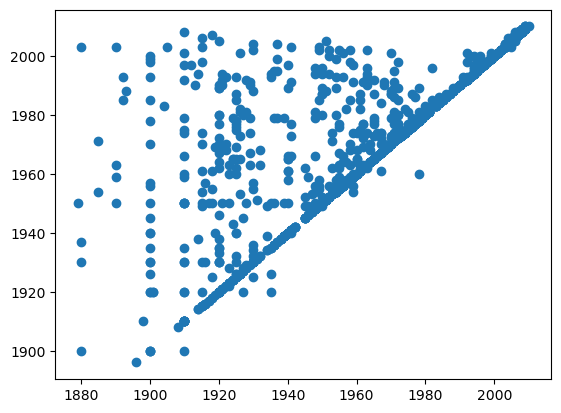

In [34]:
#For Garage Yr Blt :
plt.scatter(data_df['Year Built'], data_df['Garage Yr Blt'])
plt.show()

In [35]:
data_df.loc[data_df['Garage Yr Blt'].isna(),'Garage Yr Blt']  = data_df.loc[data_df['Garage Yr Blt'].isna(),'Year Built'] 

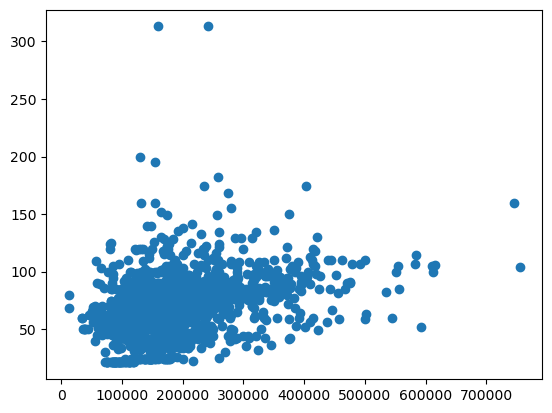

In [36]:
#For Lot Frontage
#df_test1['Lot Frontage'].hist()
plt.scatter(data_df['SalePrice'], data_df['Lot Frontage'])
plt.show()

In [51]:
r = np.corrcoef(data_df.dropna()['SalePrice'], data_df.dropna()['Lot Frontage'])
print(f'correlation r : {r[0,1]} ')

correlation r : 0.3578573349910701 


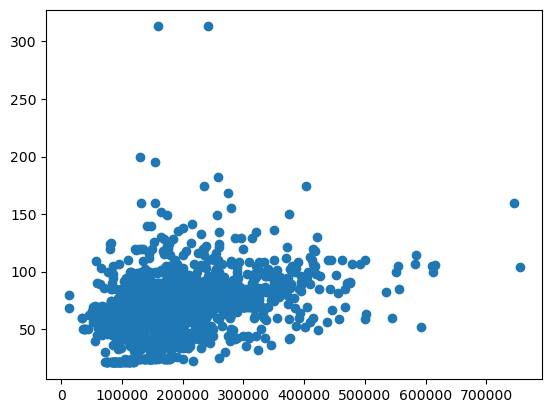

In [37]:
#For Lot Frontage
df_test1 = data_df.copy()
df_test1['Lot Frontage'] = df_test1['Lot Frontage'].fillna(df_test1['Lot Frontage'].mean())
#df_test1['Lot Frontage'].hist()
plt.scatter(df_test1['SalePrice'], df_test1['Lot Frontage'])
plt.show()

In [38]:
data_df['Lot Frontage'].mean()

69.13789632611977

In [52]:
r = np.corrcoef(df_test1['SalePrice'], df_test1['Lot Frontage'])
print(f'correlation r : {r[0,1]} ')

correlation r : 0.34141866212077826 


<AxesSubplot:>

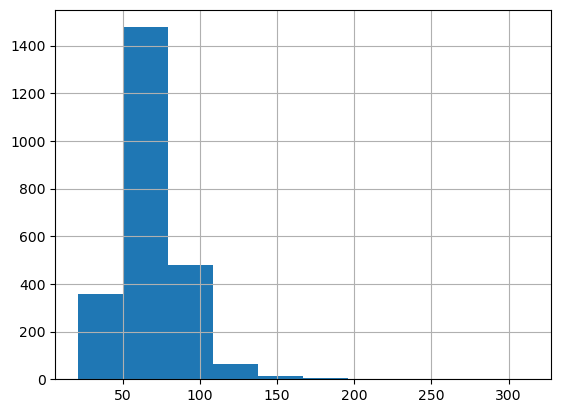

In [40]:
#For Lot Frontage
df_test2 = data_df.copy()
df_test2['Lot Frontage'] = df_test2['Lot Frontage'].fillna(df_test2['Lot Frontage'].median())
#df_test2['Lot Frontage'].hist()
plt.scatter(df_test2['SalePrice'], df_test2['Lot Frontage'])
plt.show()

In [39]:
data_df['Lot Frontage'].median()

68.0

In [53]:
r = np.corrcoef(df_test2['SalePrice'], df_test2['Lot Frontage'])
print(f'correlation r : {r[0,1]} ')

correlation r : 0.34078572795115175 


The Mean and the median are very close. So replacing missing value by one or hte other have a close result. I decide to replace missing value by the mean.

In [55]:
data_df['Lot Frontage'] = data_df['Lot Frontage'].fillna(data_df['Lot Frontage'].mean())

# Where I am
## Feature engineering

In [ ]:
### Do we have unrealistic value, not any more But now we can transform ordinal column into discret one thank to 
### Ordinal encoding with Scikit-learn
#Scikit-learn also provides an OrdinalEncoder object to encode ordinal variables. It takes the list of ordinal values and encodes them using a 0 to N integer scale. Let’s test it on the weathersit variable.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Handle ordinal variables
ord_columns = ["weathersit"]
ord_transformer = OrdinalEncoder(categories=[["clear", "cloudy", "rainy"]])

**NOTE** : Misc Feature -> a lot of NA, seems not interesting to predict Sale. To remove

Data: 2930 * 82 attributes cf documentation.txt
Training set : 2430 first ones 
test set : 500 last ones (no prices)

- The order and PID : identifiers
- the data isn't clean : there are incorrect and missinf data

## Exploratory data analysis  : EDA 
You should gain a comprehensive overview over the data by exploring and visualising the data in various ways, including the distribution of the feature values in individual features. 
Identify issues with the data that require data cleaning :
- Find and handle incorrect, missing values
- Correct inconsistencies in the variables
- Handle outliers

TO DO:
- distribution vs prices
- correlation heatmap

## Feature engineering

- Create indicator variables ex. year of construction is older than some threshold
- Transformations ex. log-transforms, polynomials

## Feature encoding

- Ordinal variables - you can order the categories
- Nominal variables - no possible ordering of the categories

Hot encoding in consequence

## Splitting data :
You should split the data into training and validation sets (e.g. 60-40 split).

## Model fitting
Your analysis should include an appropriate baseline and evaluate three different models ranging in complexity

- A baseline that entails no modeling, and supposedly should be beaten by the three models
- A simple model with two variables (three with the target variable)
- An intermediate model (between 10 and 20 variables)
- A complex model with all variables

## Evaluation metrics

MAE at least 

## Regularization
Your analysis should include regularization for the complex model.

- Briefly explain the objective of regularization, and how it will make the complex model different from other models
- Tune regularization strength with grid search
- Plot the training and validation curves
- Discuss what you observe in the plot, e.g. potential overfitting

## Communicating the results
Your analysis should also include a final visualization which summarizes the different models MAE scores. For instance, using a bar chart

## Predicting on test data
Now that you have your three models ready, let’s go to the 500 new houses that are unseen by your models. They make your test set. Get the attributes of these houses from house-prices-test.csv and predict their prices using each model and save them in a .csv file.

- Predictions from your simple model - predictions-simple-model.csv
- Predictions from your intermediate model - predictions-intermediate-model.csv
- Predictions from your complex model - predictions-complex-model.csv

Your .csv files must contain 500 rows and 2 columns: the house PID and the predicted price as SalePrice.

## Evaluate your predictions
Please check your predictions sanity and performances by yourself using exts-p3review.herokuapp.com.
Just upload the three .csv files there and if filenames and formats are valid, you will be printed the test MAEs!